# **Atharva Bhavkar**

# **GRIP: The Sparks Foundation**

# **Task1: Prediction using Supervised ML**

**In this task, we have to predict the percentage score of a student based on the number of hours studied. The dataset has two variables, where the features are number of hours studied and the target value is percentage score. This can simply be solved using Linear Regression.**

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Reading Data from dataset**

In [55]:
df=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

**Viewing Dataset**

In [56]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


**Identifying the types of features and count of records**

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [58]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**Checking if any null values present**

In [59]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

**Exploring the data**

Text(0, 0.5, 'Scores in percentage')

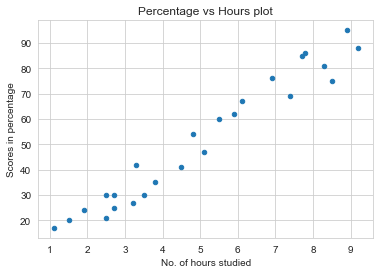

In [60]:
df.plot(x='Hours',y='Scores',kind='scatter')
plt.title("Percentage vs Hours plot")
plt.xlabel("No. of hours studied")
plt.ylabel("Scores in percentage")

In [61]:
df.corr(method='pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# **Linear Regression**

In [62]:
X = df.iloc[:,:-1].values
y = df.iloc[:,1].values

In [63]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

**Model Creation**

In [64]:
from sklearn.linear_model import LinearRegression  
lm = LinearRegression()  
lm.fit(X_train, y_train) 

print("Training complete.")

Training complete.


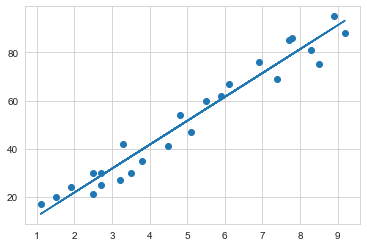

In [65]:
line = lm.coef_*X+lm.intercept_
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

**Predictions using model**

In [66]:
y_pred=lm.predict(X_test)

In [67]:
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [68]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


**Predicting on any given data**

In [72]:
# You can also test with your own data
hours = [float(x) for x in input("Enter number of hours studied by each student to predict their scores: ").split(',')]
h=np.array(hours).reshape(-1,1)
new_pred = lm.predict(h)
print("Predicted Score = {}".format(new_pred))

Enter number of hours studied by each student to predict their scores: 3.4,6.6,7.2,1.5,9.25
Predicted Score = [35.71439208 67.42849281 73.3748867  16.88414476 93.69173249]


# **Model Evaluation**

In [70]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


In [71]:
from sklearn.metrics import r2_score
print("R2 Score:",r2_score(y_test,y_pred))

R2 Score: 0.9454906892105356
